In [5]:
import json 
from urllib.parse import unquote
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timezone

# 同一期間データにタイムスタンプを

In [6]:
with open( '/home/tamak/master_exp/ThirtyMusic/relations/sessions.idomaar', mode = 'r' ) as f:
    line = f.readline()

data = line.split()
for d in data:
    print(d)


event_type, session_id, timestamp, info, linked_data = line.split()

event.session
287144
1390231051
{"numtracks":23,"playtime":4547}
{"subjects":[{"type":"user","id":44361}],"objects":[{"type":"track","id":4698874,"playstart":0,"playtime":58,"playratio":null,"action":"play"},{"type":"track","id":838286,"playstart":58,"playtime":310,"playratio":1.01,"action":"play"},{"type":"track","id":2588097,"playstart":368,"playtime":179,"playratio":1.01,"action":"play"},{"type":"track","id":2746740,"playstart":547,"playtime":342,"playratio":1.44,"action":"play"},{"type":"track","id":3873988,"playstart":889,"playtime":259,"playratio":1.01,"action":"play"},{"type":"track","id":808046,"playstart":1148,"playtime":236,"playratio":1.01,"action":"play"},{"type":"track","id":2588498,"playstart":1384,"playtime":158,"playratio":1.01,"action":"play"},{"type":"track","id":2492893,"playstart":1542,"playtime":196,"playratio":1.02,"action":"play"},{"type":"track","id":2168413,"playstart":1738,"playtime":165,"playratio":1.02,"action":"play"},{"type":"track","id":1778345,"playstart

In [3]:
track_dict = defaultdict(tuple)

with open( '/home/tamak/master_exp/ThirtyMusic/entities/tracks.idomaar', mode = 'r' ) as f:
    lines = f.readlines()

    for line in lines:
        try:
           entitiy_type, track_id, _, info, extra_info = line.split('\t')
        except:
            print(line)
            for l in line.split():
                print(l)
            break

        
        name = json.loads(info)['name']
        artistname, trackname = name.split('/_/')

        artistname = unquote(artistname.replace('+',' '))
        trackname = unquote(trackname.replace('+',' '))

        if track_id not in track_dict:
            track_dict[ track_id ] = (artistname, trackname)

In [3]:
same_dur = []

with open( '/home/tamak/master_exp/ThirtyMusic/relations/sessions.idomaar', mode = 'r' ) as f:
    lines = f.readlines()

    for line in lines:
        event_type, session_id, timestamp, info, linked_data = line.split()

        if int(timestamp) < 1399766400:
            same_dur.append( (timestamp, linked_data) )

In [9]:
same_dur_modify = []
for timestamp, data in same_dur:

    data = json.loads(data)
    tmp = [ data['subjects'][0]['id'] ]
    # subs = data['subjects'][0]
    obs = data['objects']
    timestamp = int(timestamp)

    for ob in obs:
        # same_dur_modify.append( (subs['id'], ob['id']) )
        tmp.append( (timestamp, ob['id']) )
        timestamp += ob['playtime']

    same_dur_modify.append(tmp)

In [18]:
with open('srec_data/same_duration_data.tsv', mode = 'w') as f:
    f.write('userId\tsession\n')
    for data in same_dur_modify:
        f.write(str(data[0]))
        for d in data[1:]:
            f.write('\t'+str(d[0])+','+str(d[1]))

        f.write('\n')

In [4]:
SPD_set = set()

with open('./spotify_playlists_dataset/SPD_modified.tsv', mode = 'r') as f:

    lines = f.readlines()

for line in lines[1:]:
    data = line.split('\t,\t')

    if data[1] != '' and data[2] != '':

        track = (data[1],data[2])

        SPD_set.add( track )

In [8]:
SPD_dict = defaultdict(int)
rev_SPD_dict = defaultdict(tuple)

with open('./spotify_playlists_dataset/SPD_modified.tsv', mode = 'r') as f:

    lines = f.readlines()

for line in lines[1:]:
    data = line.split('\t,\t')

    track = (data[1],data[2])

    if track not in SPD_dict:
        SPD_dict[track] = len(SPD_dict)
        rev_SPD_dict[ len(rev_SPD_dict) ] = track

In [9]:
train_set = set()

with open('srec_data/experiment_train_full.txt', mode = 'r') as f:
    lines  = f.readlines()[1:]

    for line in lines:
        ItemId = line.split()[1]
        train_set.add( rev_SPD_dict[int(ItemId)] )

In [12]:
train_set

{('Atley Moon and the Say Something Sound Machine', 'I Fall Asleep'),
 ('Foster The People', 'Are You What You Want to Be?'),
 ('Django Reinhardt', 'Swing From Paris'),
 ('Els Pets', 'Massa Jove per fer-me Gran'),
 ('Santana', 'Photograph'),
 ('Pusha T', 'King Push'),
 ('Hem', 'When I Was Drinking'),
 ('Shazman', 'Love Dem (Ragga Version)'),
 ('Machine Head', 'This Is The End'),
 ('The Radio Dept.', 'Keen on Boys'),
 ('Cafe Del Mar', 'Chill Out Flamenco mix'),
 ('Joe Miles', 'Cold Coffee'),
 ('Ocasan', 'London Town'),
 ('Heatmiser', 'You Gotta Move'),
 ('Tom Petty And The Heartbreakers', 'The Waiting'),
 ('Asura', 'Everlasting - Album Edit'),
 ('Demi Lovato', "You're My Favorite Song"),
 ('Citizen Cope', 'Every Waking Moment'),
 ('Guadalupe Plata', 'Filo De Navaja'),
 ('Jody Stapleton and the Generals', 'Drink from the Good Cup'),
 ('Ben Folds Five',
  'Sky High - Live at The Barton Theatre, Adelaide, Australia 11/16/12'),
 ('Electric President', 'Insomnia'),
 ('Dawn Penn', 'Hurt'),
 (

In [10]:
for track in train_set:
    if track in SPD_dict:
        continue
    else:
        print(track)

In [29]:
modify_list = []

with open('srec_data/same_duration_data.tsv', mode = 'r') as f:
    lines  = f.readlines()

    for line in lines[1:]:
        data = line.split('\t')
        user_id = data[0]
        session = data[1:]
        tmp = []

        for i, s in enumerate(session):

            if i > 34:
                break

            timestamp, track_id  = s.split(',')
            track = track_dict[track_id]

            if track in train_set and len(track) == 2:
                tmp.append((user_id, SPD_dict[track], timestamp))

        if len(tmp) > 1:
            modify_list.append(tmp)

In [21]:
modify_list[0]

[('44361', 143369, '1390232789'),
 ('44361', 23933, '1390233852'),
 ('44361', 276798, '1390234556')]

In [26]:
modify_list[0]

[('44361', 2335357, '1390231051'),
 ('44361', 2592958, '1390231109'),
 ('44361', 1739919, '1390231419'),
 ('44361', 1682380, '1390231598'),
 ('44361', 2364966, '1390231940'),
 ('44361', 1348397, '1390232593'),
 ('44361', 2267272, '1390232789'),
 ('44361', 394487, '1390232954'),
 ('44361', 462775, '1390233402'),
 ('44361', 2335357, '1390233596'),
 ('44361', 1851660, '1390233852'),
 ('44361', 2335357, '1390234109'),
 ('44361', 723803, '1390234556'),
 ('44361', 2335357, '1390234728'),
 ('44361', 2335357, '1390234905'),
 ('44361', 2321268, '1390235049'),
 ('44361', 2335357, '1390235183'),
 ('44361', 2335357, '1390235355'),
 ('44361', 2426595, '1390235453')]

In [30]:
with open('srec_data/experiment_test.txt', mode = 'w') as f:
    f.write('SessionId\tItemId\tTime\n')
    for session_id, (session) in enumerate(modify_list):

        for (user_id, track_id, timestamp) in session:
            f.write(str(session_id)+'\t'+str(track_id)+'\t'+str(timestamp)+'\n')

In [26]:
rev_SPD_dict[int(143369)]

('Perfume Genius', 'Learning')

In [20]:
('Perfume Genius', 'Learning') in train_set

True

In [31]:
with open('srec_data/experiment_test.txt', mode = 'r') as f:

    for line in f.readlines()[1:]:
        sessionId, itemId, time = line.split()

        if rev_SPD_dict[int(itemId)] not in train_set:
            print(itemId)
            print(rev_SPD_dict[int(itemId)])
            print(rev_SPD_dict[itemId] in train_set)
            break

In [22]:
rev_SPD_dict[143369]

('Perfume Genius', 'Learning')

30Mから持続時間を抽出

In [6]:
durations = []

with open( '/home/tamak/master_exp/ThirtyMusic/relations/sessions.idomaar', mode = 'r' ) as f:
    lines = f.readlines()

    for line in lines:
        event_type, session_id, timestamp, info, data = line.split()

        data = json.loads(data)
        obs = data['objects']

        for ob in obs:
            durations.append(ob['playtime'])

In [7]:
durations = [ duration for duration in durations if duration > 0 ]

In [2]:
# #nowplaying : 2011/7/11~
min_time = 1310256000	
max_time = 1399766400

In [ ]:
from random import randint
from random import choice
import random

mdfy_list = []
random.seed(2025)

with open('/home/tamak/master_exp/modify_dataset/spotify_playlists_dataset/user_playlist_pairs.tsv', mode = 'r') as f:

    for session_id, line in enumerate(f.readlines()[1:]):
        time = randint(min_time,max_time)
        data = line.split('\t,\t')
        user_id = data[0]
        session = data[2:]

        tmp = []
        if len(session) == 1:
            continue
        for i, track_id in enumerate(session):
            tmp.append( [ str(session_id), str(time), str(track_id.replace('\t','')) ] )

            deltatime = choice(durations)
            time += deltatime

        if time > max_time:
            diff = time-max_time
            for d in tmp:
                d[1] = str(int(d[1]) - diff)

        mdfy_list += tmp


with open('srec_data/experiment_train_full.txt', mode = 'w') as f:

    f.write('SessionId\tItemId\tTime\n')

    for data in mdfy_list:
        session_id, timestamp, track_id = data
        f.write(session_id.rstrip('\t')+'\t'+track_id.rstrip('\n')+'\t'+str(timestamp)+'\n')

: 

# repo内のデータ確認

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/modify_dataset/srec_data/experiment_test.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 10.14347074914815
分散： 323.66076822617237
中央値： 5.0
最頻値： 1
[ 1.  1.  2.  5. 11. 23. 34.]


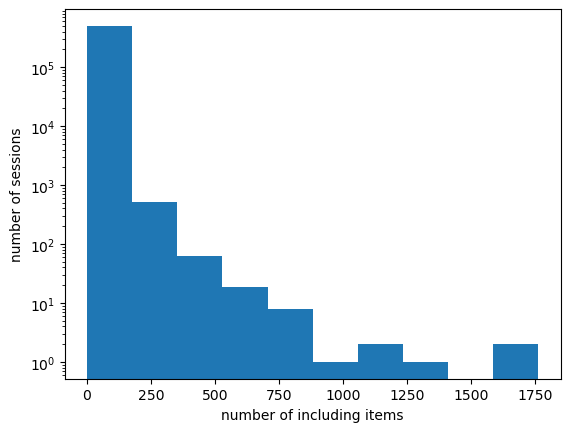

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()  

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/session-rec-master/data/rsc15/prepared/yoochoose-clicks-100k_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 3.9495335506350457
分散： 11.19740817851356
中央値： 3.0
最頻値： 2
[ 2.  2.  2.  3.  4.  7. 10.]


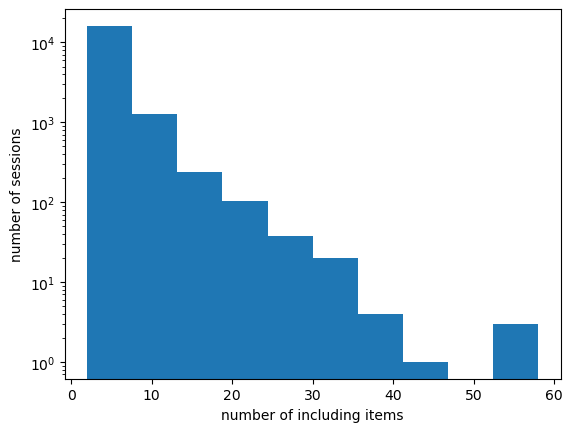

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/modify_dataset/srec_data/experiment_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 55.57886099013995
分散： 73803.33196999521
中央値： 16
最頻値： 12
[  2.   5.  11.  16.  38.  98. 175.]


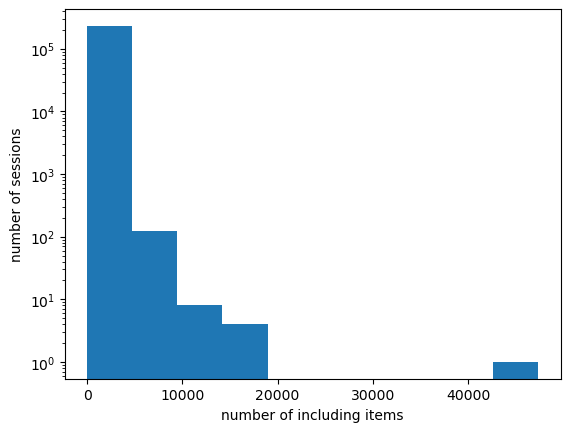

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/session-rec-master/data/rsc15/prepared/yoochoose-clicks-100k_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 3.9495335506350457
分散： 11.19740817851356
中央値： 3.0
最頻値： 2
[ 2.  2.  2.  3.  4.  7. 10.]


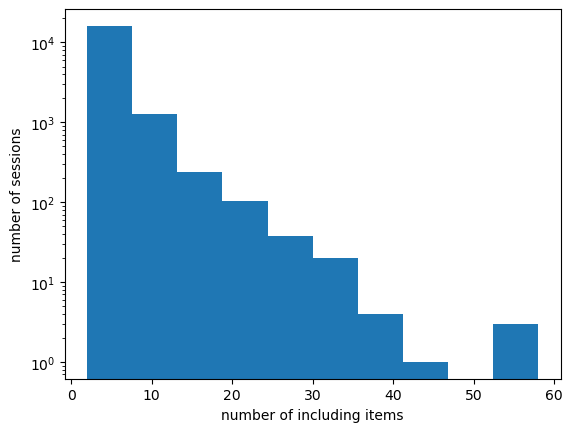

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

# repo内のデータ確認

In [34]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/modify_dataset/srec_data/experiment_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [35]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 20.533794135140493
分散： 123.49244608252279
中央値： 17.0
最頻値： 35
[ 4.  7. 11. 17. 35. 35. 35.]


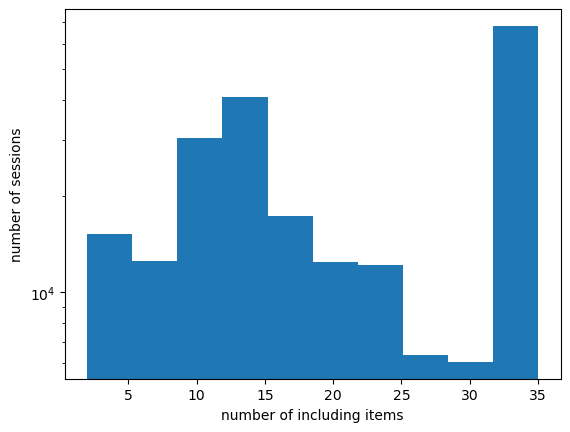

: 

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()  

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/session-rec-master/data/rsc15/prepared/yoochoose-clicks-100k_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 3.9495335506350457
分散： 11.19740817851356
中央値： 3.0
最頻値： 2
[ 2.  2.  2.  3.  4.  7. 10.]


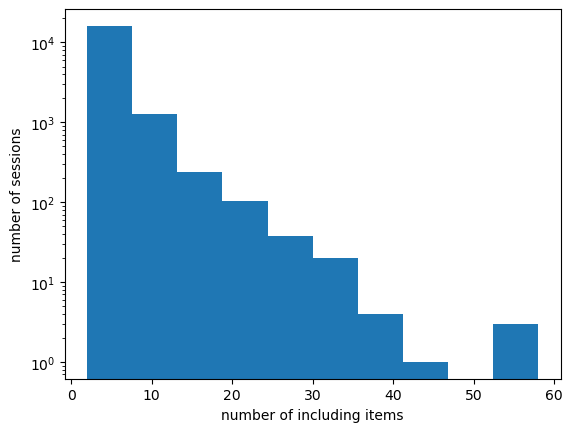

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/modify_dataset/srec_data/experiment_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 55.57886099013995
分散： 73803.33196999521
中央値： 16
最頻値： 12
[  2.   5.  11.  16.  38.  98. 175.]


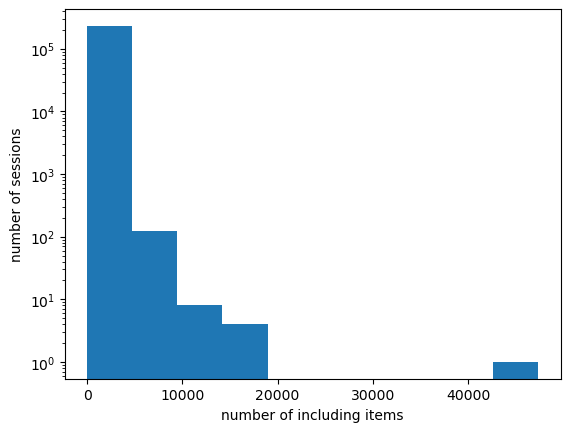

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [ ]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/session-rec-master/data/rsc15/prepared/yoochoose-clicks-100k_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [ ]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 3.9495335506350457
分散： 11.19740817851356
中央値： 3.0
最頻値： 2
[ 2.  2.  2.  3.  4.  7. 10.]


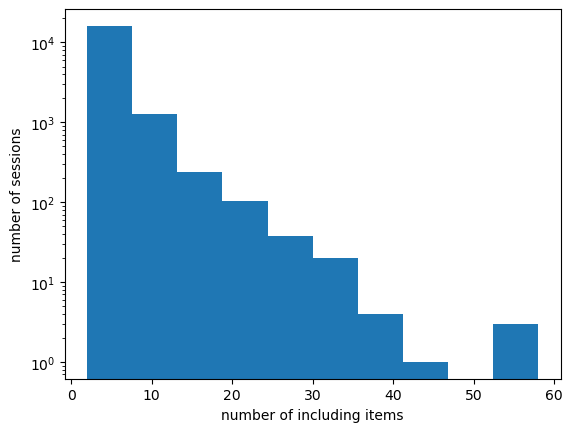

In [ ]:
import numpy as np
import statistics as stts

print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

# repo内のデータ確認

In [18]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/modify_dataset/srec_data/experiment_test.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [19]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

セッション数： 385409
平均： 8.781637169863703
分散： 54.99898498109429
中央値： 6
最頻値： 2
[ 2.  2.  3.  6. 12. 20. 25.]


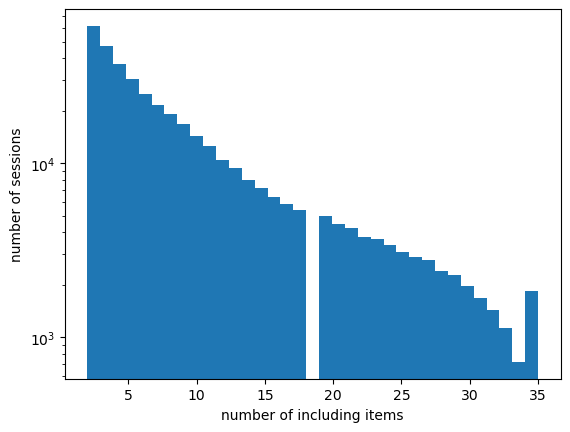

In [20]:
import numpy as np
import statistics as stts

print('セッション数：',len(session_length))
print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True, bins=35)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [19]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/session-rec-master/data/rsc15/prepared/yoochoose-clicks-100k_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [20]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

平均： 3.9495335506350457
分散： 11.19740817851356
中央値： 3.0
最頻値： 2
[ 2.  2.  2.  3.  4.  7. 10.]


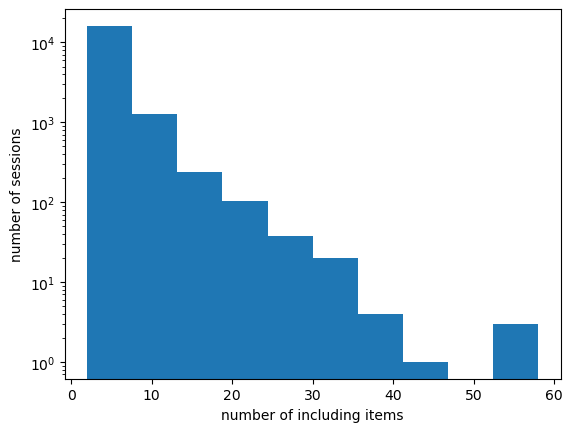

In [ ]:
import numpy as np
import statistics as stts

print('セッション数：',len(session_length))
print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True, bins=35)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [13]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/modify_dataset/srec_data/experiment_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [14]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

セッション数： 221932
平均： 20.533794135140493
分散： 123.49244608252279
中央値： 17.0
最頻値： 35
[ 4.  7. 11. 17. 35. 35. 35.]


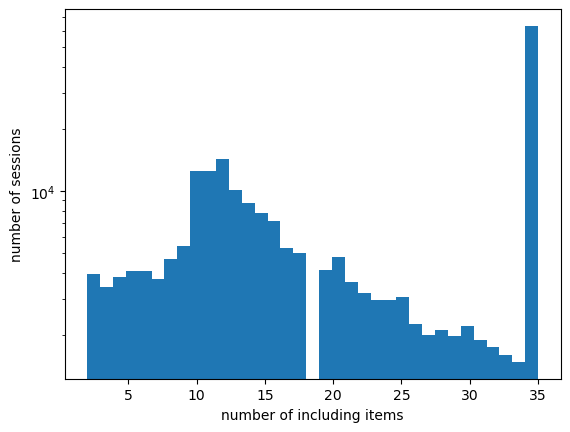

In [16]:
import numpy as np
import statistics as stts

print('セッション数：',len(session_length))
print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True, bins=35)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [2]:
session_list = defaultdict(list)

with open('/home/tamak/master_exp/session-rec-master/data/rsc15/prepared/yoochoose-clicks-100k_train_full.txt') as f:
    lines = f.readlines()[1:]

    for line in lines:
        session, item, time = line.split()

        session_list[session].append(item)

In [3]:
session_length = []

for session in session_list.values():
    session_length.append(len(session))

セッション数： 17794
平均： 3.9495335506350457
分散： 11.19740817851356
中央値： 3.0
最頻値： 2
[ 2.  2.  2.  3.  4.  7. 10.]


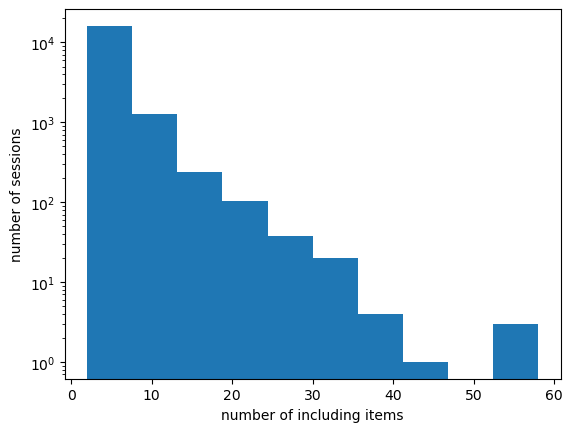

In [5]:
import numpy as np
import statistics as stts

print('セッション数：',len(session_length))
print('平均：',np.average(session_length))
print('分散：',np.var(session_length))
print('中央値：',stts.median(session_length))
print('最頻値：',stts.mode(session_length))
print( np.percentile( session_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(session_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()